<a href="https://colab.research.google.com/github/bingsen-wang/Python-Examples/blob/main/ColorsSubtractive_CMYK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Subtractive Colors CMYK
</h1></b>

Dr. Bingsen Wang

1/6/2024
</center>

#Python Code
The Python code illustrates the principle of additive colors.

i= 0
i= 0
i= 50
i= 100
i= 150
i= 0


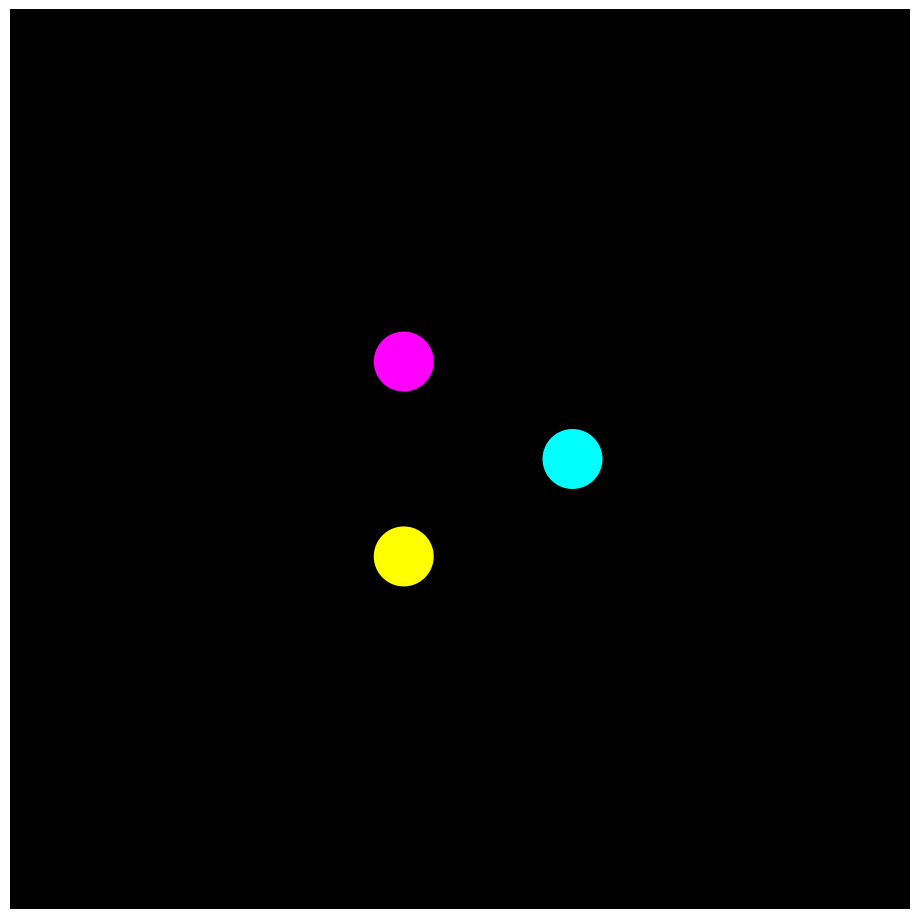

In [18]:
from os import linesep
import shapely.geometry as sg
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation,rc,colors
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "serif","mathtext.fontset" : "cm"})

#drawn n colored circles of the same radius r on a circle of radius rc
def coloredCicles(ax,r,rc,n):
  theta = np.linspace(0,2*np.pi*(n-1)/n,n)
  a = np.exp(1j*np.pi*2/3) #120 deg rotation
  uc = np.exp(1j*theta) #unit circle
  circles = [] #
  colors = []
  for i in range(len(theta)):
    p_r = max(uc[i].real,0) #red projection
    p_g = max((uc[i]*a**2).real,0) #green projection
    p_b = max((uc[i]*a).real,0) #blue projection
    pmax = max([p_r,p_g,p_b])
    # ci = [p_r/pmax, p_g/pmax, p_b/pmax] #color for ith circle
    ci = [1-p_r, 1-p_g, 1-p_b] #color for ith circle
    cl = sg.Point(rc*uc[i].real,rc*uc[i].imag).buffer(r) #circle
    ax.fill(cl.exterior.xy[0],cl.exterior.xy[1],fc=ci)
    circles.append(cl)
    colors.append(ci)
  for i in range(len(circles)):
    ab = circles[i].intersection(circles[(i+1)%len(circles)])
    c_ab = np.array(colors[i])+np.array(colors[(i+1)%len(circles)])+ np.array([-1,-1,-1])
    ax.fill(ab.exterior.xy[0],ab.exterior.xy[1],fc=c_ab)
    if i==0:
      abc = circles[0].intersection(circles[1])
      c=np.array(colors[0]) + np.array(colors[1])+np.array([-1,-1,-1])
    elif i<len(circles)-1:
      abc = abc.intersection(circles[(i+1)])
      c = np.array(c) + np.array(colors[(i+1)%len(circles)])+np.array([-1,-1,-1])
    # print(c)
    ax.fill(abc.exterior.xy[0],abc.exterior.xy[1],fc=c)
  return

#parameters
Nf = 200
rs = np.linspace(.1,2.5,Nf)

#set up figures
fig = plt.figure(figsize=(9,9))
ax_frame = [[0, 0, 1, 1], [-1.5,1.5], [-1.5,1.5]]# [pos-boundary, xlim, ylim]
xn,xm,yn,ym = ax_frame[1]+ax_frame[2]
ax=fig.add_axes(ax_frame[0],xlim=ax_frame[1], ylim=ax_frame[2],fc='none',) #no face color
# ax.get_xaxis().set_visible(False)
# ax.get_yaxis().set_visible(False)
# [ax.spines[spine].set_visible(False) for spine in ['top','bottom','left','right']]
ax.axis('off')
# animation function. This is called sequentially
def animate(i):
  if i%50==0:
    print('i=',i)
  coloredCicles(ax,rs[i],.25*xm,3)
  # coloredCicles(ax,3,.25*xm,3)
  return
# ax.fill(a[0].exterior.xy[0],a[0].exterior.xy[1],color=[1,0,0])
# ax.fill(b.exterior.xy[0],b.exterior.xy[1],color=[0,1,0])
# ax.fill(c.exterior.xy[0],c.exterior.xy[1],color=[1,1,0])

anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=20)
# anim #uncomment to generate animation in the output area
anim.save("ColorsCMYK.mp4", fps=35, dpi = 120) #uncomment to save
